# Support Vector Machines

## References

https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones/data

## Import Python Libraries

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Global Variables

In [269]:
# random state 
random_state = 8432

# colors
c_scale = 256
c1 = (1, 1, 1) # grey
c2 = (1, 0, 0) # red
c3 = (181/c_scale, 204/c_scale, 6/c_scale) # yellow
c4 = (6/c_scale, 122/c_scale, 204/c_scale) # blue
c5 = (0, 0, 0) # black

# max number of features 
k = 10

## Import Dataset

In [270]:
# Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# Dataset Column Overview: 
# ------------------------------------------------------------------------------

# X001 :  tBodyAcc-mean()-X
# X002 :  tBodyAcc-mean()-Y
# X003 :  tBodyAcc-mean()-Z
# X004 :  tBodyAcc-std()-X
# X005 :  tBodyAcc-std()-Y
# X006 :  tBodyAcc-std()-Z
# X007 :  tBodyAcc-mad()-X
# X008 :  tBodyAcc-mad()-Y
# X009 :  tBodyAcc-mad()-Z
# X010 :  tBodyAcc-max()-X
# X011 :  tBodyAcc-max()-Y
# X012 :  tBodyAcc-max()-Z
# X013 :  tBodyAcc-min()-X
# X014 :  tBodyAcc-min()-Y
# X015 :  tBodyAcc-min()-Z
# X016 :  tBodyAcc-sma()
# X017 :  tBodyAcc-energy()-X
# X018 :  tBodyAcc-energy()-Y
# X019 :  tBodyAcc-energy()-Z
# X020 :  tBodyAcc-iqr()-X
# X021 :  tBodyAcc-iqr()-Y
# X022 :  tBodyAcc-iqr()-Z
# X023 :  tBodyAcc-entropy()-X
# X024 :  tBodyAcc-entropy()-Y
# X025 :  tBodyAcc-entropy()-Z
# X026 :  tBodyAcc-arCoeff()-X,1
# X027 :  tBodyAcc-arCoeff()-X,2
# X028 :  tBodyAcc-arCoeff()-X,3
# X029 :  tBodyAcc-arCoeff()-X,4
# X030 :  tBodyAcc-arCoeff()-Y,1
# X031 :  tBodyAcc-arCoeff()-Y,2
# X032 :  tBodyAcc-arCoeff()-Y,3
# X033 :  tBodyAcc-arCoeff()-Y,4
# X034 :  tBodyAcc-arCoeff()-Z,1
# X035 :  tBodyAcc-arCoeff()-Z,2
# X036 :  tBodyAcc-arCoeff()-Z,3
# X037 :  tBodyAcc-arCoeff()-Z,4
# X038 :  tBodyAcc-correlation()-X,Y
# X039 :  tBodyAcc-correlation()-X,Z
# X040 :  tBodyAcc-correlation()-Y,Z
# X041 :  tGravityAcc-mean()-X
# X042 :  tGravityAcc-mean()-Y
# X043 :  tGravityAcc-mean()-Z
# X044 :  tGravityAcc-std()-X
# X045 :  tGravityAcc-std()-Y
# X046 :  tGravityAcc-std()-Z
# X047 :  tGravityAcc-mad()-X
# X048 :  tGravityAcc-mad()-Y
# X049 :  tGravityAcc-mad()-Z
# X050 :  tGravityAcc-max()-X
# X051 :  tGravityAcc-max()-Y
# X052 :  tGravityAcc-max()-Z
# X053 :  tGravityAcc-min()-X
# X054 :  tGravityAcc-min()-Y
# X055 :  tGravityAcc-min()-Z
# X056 :  tGravityAcc-sma()
# X057 :  tGravityAcc-energy()-X
# X058 :  tGravityAcc-energy()-Y
# X059 :  tGravityAcc-energy()-Z
# X060 :  tGravityAcc-iqr()-X
# X061 :  tGravityAcc-iqr()-Y
# X062 :  tGravityAcc-iqr()-Z
# X063 :  tGravityAcc-entropy()-X
# X064 :  tGravityAcc-entropy()-Y
# X065 :  tGravityAcc-entropy()-Z
# X066 :  tGravityAcc-arCoeff()-X,1
# X067 :  tGravityAcc-arCoeff()-X,2
# X068 :  tGravityAcc-arCoeff()-X,3
# X069 :  tGravityAcc-arCoeff()-X,4
# X070 :  tGravityAcc-arCoeff()-Y,1
# X071 :  tGravityAcc-arCoeff()-Y,2
# X072 :  tGravityAcc-arCoeff()-Y,3
# X073 :  tGravityAcc-arCoeff()-Y,4
# X074 :  tGravityAcc-arCoeff()-Z,1
# X075 :  tGravityAcc-arCoeff()-Z,2
# X076 :  tGravityAcc-arCoeff()-Z,3
# X077 :  tGravityAcc-arCoeff()-Z,4
# X078 :  tGravityAcc-correlation()-X,Y
# X079 :  tGravityAcc-correlation()-X,Z
# X080 :  tGravityAcc-correlation()-Y,Z
# X081 :  tBodyAccJerk-mean()-X
# X082 :  tBodyAccJerk-mean()-Y
# X083 :  tBodyAccJerk-mean()-Z
# X084 :  tBodyAccJerk-std()-X
# X085 :  tBodyAccJerk-std()-Y
# X086 :  tBodyAccJerk-std()-Z
# X087 :  tBodyAccJerk-mad()-X
# X088 :  tBodyAccJerk-mad()-Y
# X089 :  tBodyAccJerk-mad()-Z
# X090 :  tBodyAccJerk-max()-X
# X091 :  tBodyAccJerk-max()-Y
# X092 :  tBodyAccJerk-max()-Z
# X093 :  tBodyAccJerk-min()-X
# X094 :  tBodyAccJerk-min()-Y
# X095 :  tBodyAccJerk-min()-Z
# X096 :  tBodyAccJerk-sma()
# X097 :  tBodyAccJerk-energy()-X
# X098 :  tBodyAccJerk-energy()-Y
# X099 :  tBodyAccJerk-energy()-Z
# X100 :  tBodyAccJerk-iqr()-X
# X101 :  tBodyAccJerk-iqr()-Y
# X102 :  tBodyAccJerk-iqr()-Z
# X103 :  tBodyAccJerk-entropy()-X
# X104 :  tBodyAccJerk-entropy()-Y
# X105 :  tBodyAccJerk-entropy()-Z
# X106 :  tBodyAccJerk-arCoeff()-X,1
# X107 :  tBodyAccJerk-arCoeff()-X,2
# X108 :  tBodyAccJerk-arCoeff()-X,3
# X109 :  tBodyAccJerk-arCoeff()-X,4
# X110 :  tBodyAccJerk-arCoeff()-Y,1
# X111 :  tBodyAccJerk-arCoeff()-Y,2
# X112 :  tBodyAccJerk-arCoeff()-Y,3
# X113 :  tBodyAccJerk-arCoeff()-Y,4
# X114 :  tBodyAccJerk-arCoeff()-Z,1
# X115 :  tBodyAccJerk-arCoeff()-Z,2
# X116 :  tBodyAccJerk-arCoeff()-Z,3
# X117 :  tBodyAccJerk-arCoeff()-Z,4
# X118 :  tBodyAccJerk-correlation()-X,Y
# X119 :  tBodyAccJerk-correlation()-X,Z
# X120 :  tBodyAccJerk-correlation()-Y,Z
# X121 :  tBodyGyro-mean()-X
# X122 :  tBodyGyro-mean()-Y
# X123 :  tBodyGyro-mean()-Z
# X124 :  tBodyGyro-std()-X
# X125 :  tBodyGyro-std()-Y
# X126 :  tBodyGyro-std()-Z
# X127 :  tBodyGyro-mad()-X
# X128 :  tBodyGyro-mad()-Y
# X129 :  tBodyGyro-mad()-Z
# X130 :  tBodyGyro-max()-X
# X131 :  tBodyGyro-max()-Y
# X132 :  tBodyGyro-max()-Z
# X133 :  tBodyGyro-min()-X
# X134 :  tBodyGyro-min()-Y
# X135 :  tBodyGyro-min()-Z
# X136 :  tBodyGyro-sma()
# X137 :  tBodyGyro-energy()-X
# X138 :  tBodyGyro-energy()-Y
# X139 :  tBodyGyro-energy()-Z
# X140 :  tBodyGyro-iqr()-X
# X141 :  tBodyGyro-iqr()-Y
# X142 :  tBodyGyro-iqr()-Z
# X143 :  tBodyGyro-entropy()-X
# X144 :  tBodyGyro-entropy()-Y
# X145 :  tBodyGyro-entropy()-Z
# X146 :  tBodyGyro-arCoeff()-X,1
# X147 :  tBodyGyro-arCoeff()-X,2
# X148 :  tBodyGyro-arCoeff()-X,3
# X149 :  tBodyGyro-arCoeff()-X,4
# X150 :  tBodyGyro-arCoeff()-Y,1
# X151 :  tBodyGyro-arCoeff()-Y,2
# X152 :  tBodyGyro-arCoeff()-Y,3
# X153 :  tBodyGyro-arCoeff()-Y,4
# X154 :  tBodyGyro-arCoeff()-Z,1
# X155 :  tBodyGyro-arCoeff()-Z,2
# X156 :  tBodyGyro-arCoeff()-Z,3
# X157 :  tBodyGyro-arCoeff()-Z,4
# X158 :  tBodyGyro-correlation()-X,Y
# X159 :  tBodyGyro-correlation()-X,Z
# X160 :  tBodyGyro-correlation()-Y,Z
# X161 :  tBodyGyroJerk-mean()-X
# X162 :  tBodyGyroJerk-mean()-Y
# X163 :  tBodyGyroJerk-mean()-Z
# X164 :  tBodyGyroJerk-std()-X
# X165 :  tBodyGyroJerk-std()-Y
# X166 :  tBodyGyroJerk-std()-Z
# X167 :  tBodyGyroJerk-mad()-X
# X168 :  tBodyGyroJerk-mad()-Y
# X169 :  tBodyGyroJerk-mad()-Z
# X170 :  tBodyGyroJerk-max()-X
# X171 :  tBodyGyroJerk-max()-Y
# X172 :  tBodyGyroJerk-max()-Z
# X173 :  tBodyGyroJerk-min()-X
# X174 :  tBodyGyroJerk-min()-Y
# X175 :  tBodyGyroJerk-min()-Z
# X176 :  tBodyGyroJerk-sma()
# X177 :  tBodyGyroJerk-energy()-X
# X178 :  tBodyGyroJerk-energy()-Y
# X179 :  tBodyGyroJerk-energy()-Z
# X180 :  tBodyGyroJerk-iqr()-X
# X181 :  tBodyGyroJerk-iqr()-Y
# X182 :  tBodyGyroJerk-iqr()-Z
# X183 :  tBodyGyroJerk-entropy()-X
# X184 :  tBodyGyroJerk-entropy()-Y
# X185 :  tBodyGyroJerk-entropy()-Z
# X186 :  tBodyGyroJerk-arCoeff()-X,1
# X187 :  tBodyGyroJerk-arCoeff()-X,2
# X188 :  tBodyGyroJerk-arCoeff()-X,3
# X189 :  tBodyGyroJerk-arCoeff()-X,4
# X190 :  tBodyGyroJerk-arCoeff()-Y,1
# X191 :  tBodyGyroJerk-arCoeff()-Y,2
# X192 :  tBodyGyroJerk-arCoeff()-Y,3
# X193 :  tBodyGyroJerk-arCoeff()-Y,4
# X194 :  tBodyGyroJerk-arCoeff()-Z,1
# X195 :  tBodyGyroJerk-arCoeff()-Z,2
# X196 :  tBodyGyroJerk-arCoeff()-Z,3
# X197 :  tBodyGyroJerk-arCoeff()-Z,4
# X198 :  tBodyGyroJerk-correlation()-X,Y
# X199 :  tBodyGyroJerk-correlation()-X,Z
# X200 :  tBodyGyroJerk-correlation()-Y,Z
# X201 :  tBodyAccMag-mean()
# X202 :  tBodyAccMag-std()
# X203 :  tBodyAccMag-mad()
# X204 :  tBodyAccMag-max()
# X205 :  tBodyAccMag-min()
# X206 :  tBodyAccMag-sma()
# X207 :  tBodyAccMag-energy()
# X208 :  tBodyAccMag-iqr()
# X209 :  tBodyAccMag-entropy()
# X210 :  tBodyAccMag-arCoeff()1
# X211 :  tBodyAccMag-arCoeff()2
# X212 :  tBodyAccMag-arCoeff()3
# X213 :  tBodyAccMag-arCoeff()4
# X214 :  tGravityAccMag-mean()
# X215 :  tGravityAccMag-std()
# X216 :  tGravityAccMag-mad()
# X217 :  tGravityAccMag-max()
# X218 :  tGravityAccMag-min()
# X219 :  tGravityAccMag-sma()
# X220 :  tGravityAccMag-energy()
# X221 :  tGravityAccMag-iqr()
# X222 :  tGravityAccMag-entropy()
# X223 :  tGravityAccMag-arCoeff()1
# X224 :  tGravityAccMag-arCoeff()2
# X225 :  tGravityAccMag-arCoeff()3
# X226 :  tGravityAccMag-arCoeff()4
# X227 :  tBodyAccJerkMag-mean()
# X228 :  tBodyAccJerkMag-std()
# X229 :  tBodyAccJerkMag-mad()
# X230 :  tBodyAccJerkMag-max()
# X231 :  tBodyAccJerkMag-min()
# X232 :  tBodyAccJerkMag-sma()
# X233 :  tBodyAccJerkMag-energy()
# X234 :  tBodyAccJerkMag-iqr()
# X235 :  tBodyAccJerkMag-entropy()
# X236 :  tBodyAccJerkMag-arCoeff()1
# X237 :  tBodyAccJerkMag-arCoeff()2
# X238 :  tBodyAccJerkMag-arCoeff()3
# X239 :  tBodyAccJerkMag-arCoeff()4
# X240 :  tBodyGyroMag-mean()
# X241 :  tBodyGyroMag-std()
# X242 :  tBodyGyroMag-mad()
# X243 :  tBodyGyroMag-max()
# X244 :  tBodyGyroMag-min()
# X245 :  tBodyGyroMag-sma()
# X246 :  tBodyGyroMag-energy()
# X247 :  tBodyGyroMag-iqr()
# X248 :  tBodyGyroMag-entropy()
# X249 :  tBodyGyroMag-arCoeff()1
# X250 :  tBodyGyroMag-arCoeff()2
# X251 :  tBodyGyroMag-arCoeff()3
# X252 :  tBodyGyroMag-arCoeff()4
# X253 :  tBodyGyroJerkMag-mean()
# X254 :  tBodyGyroJerkMag-std()
# X255 :  tBodyGyroJerkMag-mad()
# X256 :  tBodyGyroJerkMag-max()
# X257 :  tBodyGyroJerkMag-min()
# X258 :  tBodyGyroJerkMag-sma()
# X259 :  tBodyGyroJerkMag-energy()
# X260 :  tBodyGyroJerkMag-iqr()
# X261 :  tBodyGyroJerkMag-entropy()
# X262 :  tBodyGyroJerkMag-arCoeff()1
# X263 :  tBodyGyroJerkMag-arCoeff()2
# X264 :  tBodyGyroJerkMag-arCoeff()3
# X265 :  tBodyGyroJerkMag-arCoeff()4
# X266 :  fBodyAcc-mean()-X
# X267 :  fBodyAcc-mean()-Y
# X268 :  fBodyAcc-mean()-Z
# X269 :  fBodyAcc-std()-X
# X270 :  fBodyAcc-std()-Y
# X271 :  fBodyAcc-std()-Z
# X272 :  fBodyAcc-mad()-X
# X273 :  fBodyAcc-mad()-Y
# X274 :  fBodyAcc-mad()-Z
# X275 :  fBodyAcc-max()-X
# X276 :  fBodyAcc-max()-Y
# X277 :  fBodyAcc-max()-Z
# X278 :  fBodyAcc-min()-X
# X279 :  fBodyAcc-min()-Y
# X280 :  fBodyAcc-min()-Z
# X281 :  fBodyAcc-sma()
# X282 :  fBodyAcc-energy()-X
# X283 :  fBodyAcc-energy()-Y
# X284 :  fBodyAcc-energy()-Z
# X285 :  fBodyAcc-iqr()-X
# X286 :  fBodyAcc-iqr()-Y
# X287 :  fBodyAcc-iqr()-Z
# X288 :  fBodyAcc-entropy()-X
# X289 :  fBodyAcc-entropy()-Y
# X290 :  fBodyAcc-entropy()-Z
# X291 :  fBodyAcc-maxInds-X
# X292 :  fBodyAcc-maxInds-Y
# X293 :  fBodyAcc-maxInds-Z
# X294 :  fBodyAcc-meanFreq()-X
# X295 :  fBodyAcc-meanFreq()-Y
# X296 :  fBodyAcc-meanFreq()-Z
# X297 :  fBodyAcc-skewness()-X
# X298 :  fBodyAcc-kurtosis()-X
# X299 :  fBodyAcc-skewness()-Y
# X300 :  fBodyAcc-kurtosis()-Y
# X301 :  fBodyAcc-skewness()-Z
# X302 :  fBodyAcc-kurtosis()-Z
# X303 :  fBodyAcc-bandsEnergy()-1,8
# X304 :  fBodyAcc-bandsEnergy()-9,16
# X305 :  fBodyAcc-bandsEnergy()-17,24
# X306 :  fBodyAcc-bandsEnergy()-25,32
# X307 :  fBodyAcc-bandsEnergy()-33,40
# X308 :  fBodyAcc-bandsEnergy()-41,48
# X309 :  fBodyAcc-bandsEnergy()-49,56
# X310 :  fBodyAcc-bandsEnergy()-57,64
# X311 :  fBodyAcc-bandsEnergy()-1,16
# X312 :  fBodyAcc-bandsEnergy()-17,32
# X313 :  fBodyAcc-bandsEnergy()-33,48
# X314 :  fBodyAcc-bandsEnergy()-49,64
# X315 :  fBodyAcc-bandsEnergy()-1,24
# X316 :  fBodyAcc-bandsEnergy()-25,48
# X317 :  fBodyAcc-bandsEnergy()-1,8
# X318 :  fBodyAcc-bandsEnergy()-9,16
# X319 :  fBodyAcc-bandsEnergy()-17,24
# X320 :  fBodyAcc-bandsEnergy()-25,32
# X321 :  fBodyAcc-bandsEnergy()-33,40
# X322 :  fBodyAcc-bandsEnergy()-41,48
# X323 :  fBodyAcc-bandsEnergy()-49,56
# X324 :  fBodyAcc-bandsEnergy()-57,64
# X325 :  fBodyAcc-bandsEnergy()-1,16
# X326 :  fBodyAcc-bandsEnergy()-17,32
# X327 :  fBodyAcc-bandsEnergy()-33,48
# X328 :  fBodyAcc-bandsEnergy()-49,64
# X329 :  fBodyAcc-bandsEnergy()-1,24
# X330 :  fBodyAcc-bandsEnergy()-25,48
# X331 :  fBodyAcc-bandsEnergy()-1,8
# X332 :  fBodyAcc-bandsEnergy()-9,16
# X333 :  fBodyAcc-bandsEnergy()-17,24
# X334 :  fBodyAcc-bandsEnergy()-25,32
# X335 :  fBodyAcc-bandsEnergy()-33,40
# X336 :  fBodyAcc-bandsEnergy()-41,48
# X337 :  fBodyAcc-bandsEnergy()-49,56
# X338 :  fBodyAcc-bandsEnergy()-57,64
# X339 :  fBodyAcc-bandsEnergy()-1,16
# X340 :  fBodyAcc-bandsEnergy()-17,32
# X341 :  fBodyAcc-bandsEnergy()-33,48
# X342 :  fBodyAcc-bandsEnergy()-49,64
# X343 :  fBodyAcc-bandsEnergy()-1,24
# X344 :  fBodyAcc-bandsEnergy()-25,48
# X345 :  fBodyAccJerk-mean()-X
# X346 :  fBodyAccJerk-mean()-Y
# X347 :  fBodyAccJerk-mean()-Z
# X348 :  fBodyAccJerk-std()-X
# X349 :  fBodyAccJerk-std()-Y
# X350 :  fBodyAccJerk-std()-Z
# X351 :  fBodyAccJerk-mad()-X
# X352 :  fBodyAccJerk-mad()-Y
# X353 :  fBodyAccJerk-mad()-Z
# X354 :  fBodyAccJerk-max()-X
# X355 :  fBodyAccJerk-max()-Y
# X356 :  fBodyAccJerk-max()-Z
# X357 :  fBodyAccJerk-min()-X
# X358 :  fBodyAccJerk-min()-Y
# X359 :  fBodyAccJerk-min()-Z
# X360 :  fBodyAccJerk-sma()
# X361 :  fBodyAccJerk-energy()-X
# X362 :  fBodyAccJerk-energy()-Y
# X363 :  fBodyAccJerk-energy()-Z
# X364 :  fBodyAccJerk-iqr()-X
# X365 :  fBodyAccJerk-iqr()-Y
# X366 :  fBodyAccJerk-iqr()-Z
# X367 :  fBodyAccJerk-entropy()-X
# X368 :  fBodyAccJerk-entropy()-Y
# X369 :  fBodyAccJerk-entropy()-Z
# X370 :  fBodyAccJerk-maxInds-X
# X371 :  fBodyAccJerk-maxInds-Y
# X372 :  fBodyAccJerk-maxInds-Z
# X373 :  fBodyAccJerk-meanFreq()-X
# X374 :  fBodyAccJerk-meanFreq()-Y
# X375 :  fBodyAccJerk-meanFreq()-Z
# X376 :  fBodyAccJerk-skewness()-X
# X377 :  fBodyAccJerk-kurtosis()-X
# X378 :  fBodyAccJerk-skewness()-Y
# X379 :  fBodyAccJerk-kurtosis()-Y
# X380 :  fBodyAccJerk-skewness()-Z
# X381 :  fBodyAccJerk-kurtosis()-Z
# X382 :  fBodyAccJerk-bandsEnergy()-1,8
# X383 :  fBodyAccJerk-bandsEnergy()-9,16
# X384 :  fBodyAccJerk-bandsEnergy()-17,24
# X385 :  fBodyAccJerk-bandsEnergy()-25,32
# X386 :  fBodyAccJerk-bandsEnergy()-33,40
# X387 :  fBodyAccJerk-bandsEnergy()-41,48
# X388 :  fBodyAccJerk-bandsEnergy()-49,56
# X389 :  fBodyAccJerk-bandsEnergy()-57,64
# X390 :  fBodyAccJerk-bandsEnergy()-1,16
# X391 :  fBodyAccJerk-bandsEnergy()-17,32
# X392 :  fBodyAccJerk-bandsEnergy()-33,48
# X393 :  fBodyAccJerk-bandsEnergy()-49,64
# X394 :  fBodyAccJerk-bandsEnergy()-1,24
# X395 :  fBodyAccJerk-bandsEnergy()-25,48
# X396 :  fBodyAccJerk-bandsEnergy()-1,8
# X397 :  fBodyAccJerk-bandsEnergy()-9,16
# X398 :  fBodyAccJerk-bandsEnergy()-17,24
# X399 :  fBodyAccJerk-bandsEnergy()-25,32
# X400 :  fBodyAccJerk-bandsEnergy()-33,40
# X401 :  fBodyAccJerk-bandsEnergy()-41,48
# X402 :  fBodyAccJerk-bandsEnergy()-49,56
# X403 :  fBodyAccJerk-bandsEnergy()-57,64
# X404 :  fBodyAccJerk-bandsEnergy()-1,16
# X405 :  fBodyAccJerk-bandsEnergy()-17,32
# X406 :  fBodyAccJerk-bandsEnergy()-33,48
# X407 :  fBodyAccJerk-bandsEnergy()-49,64
# X408 :  fBodyAccJerk-bandsEnergy()-1,24
# X409 :  fBodyAccJerk-bandsEnergy()-25,48
# X410 :  fBodyAccJerk-bandsEnergy()-1,8
# X411 :  fBodyAccJerk-bandsEnergy()-9,16
# X412 :  fBodyAccJerk-bandsEnergy()-17,24
# X413 :  fBodyAccJerk-bandsEnergy()-25,32
# X414 :  fBodyAccJerk-bandsEnergy()-33,40
# X415 :  fBodyAccJerk-bandsEnergy()-41,48
# X416 :  fBodyAccJerk-bandsEnergy()-49,56
# X417 :  fBodyAccJerk-bandsEnergy()-57,64
# X418 :  fBodyAccJerk-bandsEnergy()-1,16
# X419 :  fBodyAccJerk-bandsEnergy()-17,32
# X420 :  fBodyAccJerk-bandsEnergy()-33,48
# X421 :  fBodyAccJerk-bandsEnergy()-49,64
# X422 :  fBodyAccJerk-bandsEnergy()-1,24
# X423 :  fBodyAccJerk-bandsEnergy()-25,48
# X424 :  fBodyGyro-mean()-X
# X425 :  fBodyGyro-mean()-Y
# X426 :  fBodyGyro-mean()-Z
# X427 :  fBodyGyro-std()-X
# X428 :  fBodyGyro-std()-Y
# X429 :  fBodyGyro-std()-Z
# X430 :  fBodyGyro-mad()-X
# X431 :  fBodyGyro-mad()-Y
# X432 :  fBodyGyro-mad()-Z
# X433 :  fBodyGyro-max()-X
# X434 :  fBodyGyro-max()-Y
# X435 :  fBodyGyro-max()-Z
# X436 :  fBodyGyro-min()-X
# X437 :  fBodyGyro-min()-Y
# X438 :  fBodyGyro-min()-Z
# X439 :  fBodyGyro-sma()
# X440 :  fBodyGyro-energy()-X
# X441 :  fBodyGyro-energy()-Y
# X442 :  fBodyGyro-energy()-Z
# X443 :  fBodyGyro-iqr()-X
# X444 :  fBodyGyro-iqr()-Y
# X445 :  fBodyGyro-iqr()-Z
# X446 :  fBodyGyro-entropy()-X
# X447 :  fBodyGyro-entropy()-Y
# X448 :  fBodyGyro-entropy()-Z
# X449 :  fBodyGyro-maxInds-X
# X450 :  fBodyGyro-maxInds-Y
# X451 :  fBodyGyro-maxInds-Z
# X452 :  fBodyGyro-meanFreq()-X
# X453 :  fBodyGyro-meanFreq()-Y
# X454 :  fBodyGyro-meanFreq()-Z
# X455 :  fBodyGyro-skewness()-X
# X456 :  fBodyGyro-kurtosis()-X
# X457 :  fBodyGyro-skewness()-Y
# X458 :  fBodyGyro-kurtosis()-Y
# X459 :  fBodyGyro-skewness()-Z
# X460 :  fBodyGyro-kurtosis()-Z
# X461 :  fBodyGyro-bandsEnergy()-1,8
# X462 :  fBodyGyro-bandsEnergy()-9,16
# X463 :  fBodyGyro-bandsEnergy()-17,24
# X464 :  fBodyGyro-bandsEnergy()-25,32
# X465 :  fBodyGyro-bandsEnergy()-33,40
# X466 :  fBodyGyro-bandsEnergy()-41,48
# X467 :  fBodyGyro-bandsEnergy()-49,56
# X468 :  fBodyGyro-bandsEnergy()-57,64
# X469 :  fBodyGyro-bandsEnergy()-1,16
# X470 :  fBodyGyro-bandsEnergy()-17,32
# X471 :  fBodyGyro-bandsEnergy()-33,48
# X472 :  fBodyGyro-bandsEnergy()-49,64
# X473 :  fBodyGyro-bandsEnergy()-1,24
# X474 :  fBodyGyro-bandsEnergy()-25,48
# X475 :  fBodyGyro-bandsEnergy()-1,8
# X476 :  fBodyGyro-bandsEnergy()-9,16
# X477 :  fBodyGyro-bandsEnergy()-17,24
# X478 :  fBodyGyro-bandsEnergy()-25,32
# X479 :  fBodyGyro-bandsEnergy()-33,40
# X480 :  fBodyGyro-bandsEnergy()-41,48
# X481 :  fBodyGyro-bandsEnergy()-49,56
# X482 :  fBodyGyro-bandsEnergy()-57,64
# X483 :  fBodyGyro-bandsEnergy()-1,16
# X484 :  fBodyGyro-bandsEnergy()-17,32
# X485 :  fBodyGyro-bandsEnergy()-33,48
# X486 :  fBodyGyro-bandsEnergy()-49,64
# X487 :  fBodyGyro-bandsEnergy()-1,24
# X488 :  fBodyGyro-bandsEnergy()-25,48
# X489 :  fBodyGyro-bandsEnergy()-1,8
# X490 :  fBodyGyro-bandsEnergy()-9,16
# X491 :  fBodyGyro-bandsEnergy()-17,24
# X492 :  fBodyGyro-bandsEnergy()-25,32
# X493 :  fBodyGyro-bandsEnergy()-33,40
# X494 :  fBodyGyro-bandsEnergy()-41,48
# X495 :  fBodyGyro-bandsEnergy()-49,56
# X496 :  fBodyGyro-bandsEnergy()-57,64
# X497 :  fBodyGyro-bandsEnergy()-1,16
# X498 :  fBodyGyro-bandsEnergy()-17,32
# X499 :  fBodyGyro-bandsEnergy()-33,48
# X500 :  fBodyGyro-bandsEnergy()-49,64
# X501 :  fBodyGyro-bandsEnergy()-1,24
# X502 :  fBodyGyro-bandsEnergy()-25,48
# X503 :  fBodyAccMag-mean()
# X504 :  fBodyAccMag-std()
# X505 :  fBodyAccMag-mad()
# X506 :  fBodyAccMag-max()
# X507 :  fBodyAccMag-min()
# X508 :  fBodyAccMag-sma()
# X509 :  fBodyAccMag-energy()
# X510 :  fBodyAccMag-iqr()
# X511 :  fBodyAccMag-entropy()
# X512 :  fBodyAccMag-maxInds
# X513 :  fBodyAccMag-meanFreq()
# X514 :  fBodyAccMag-skewness()
# X515 :  fBodyAccMag-kurtosis()
# X516 :  fBodyBodyAccJerkMag-mean()
# X517 :  fBodyBodyAccJerkMag-std()
# X518 :  fBodyBodyAccJerkMag-mad()
# X519 :  fBodyBodyAccJerkMag-max()
# X520 :  fBodyBodyAccJerkMag-min()
# X521 :  fBodyBodyAccJerkMag-sma()
# X522 :  fBodyBodyAccJerkMag-energy()
# X523 :  fBodyBodyAccJerkMag-iqr()
# X524 :  fBodyBodyAccJerkMag-entropy()
# X525 :  fBodyBodyAccJerkMag-maxInds
# X526 :  fBodyBodyAccJerkMag-meanFreq()
# X527 :  fBodyBodyAccJerkMag-skewness()
# X528 :  fBodyBodyAccJerkMag-kurtosis()
# X529 :  fBodyBodyGyroMag-mean()
# X530 :  fBodyBodyGyroMag-std()
# X531 :  fBodyBodyGyroMag-mad()
# X532 :  fBodyBodyGyroMag-max()
# X533 :  fBodyBodyGyroMag-min()
# X534 :  fBodyBodyGyroMag-sma()
# X535 :  fBodyBodyGyroMag-energy()
# X536 :  fBodyBodyGyroMag-iqr()
# X537 :  fBodyBodyGyroMag-entropy()
# X538 :  fBodyBodyGyroMag-maxInds
# X539 :  fBodyBodyGyroMag-meanFreq()
# X540 :  fBodyBodyGyroMag-skewness()
# X541 :  fBodyBodyGyroMag-kurtosis()
# X542 :  fBodyBodyGyroJerkMag-mean()
# X543 :  fBodyBodyGyroJerkMag-std()
# X544 :  fBodyBodyGyroJerkMag-mad()
# X545 :  fBodyBodyGyroJerkMag-max()
# X546 :  fBodyBodyGyroJerkMag-min()
# X547 :  fBodyBodyGyroJerkMag-sma()
# X548 :  fBodyBodyGyroJerkMag-energy()
# X549 :  fBodyBodyGyroJerkMag-iqr()
# X550 :  fBodyBodyGyroJerkMag-entropy()
# X551 :  fBodyBodyGyroJerkMag-maxInds
# X552 :  fBodyBodyGyroJerkMag-meanFreq()
# X553 :  fBodyBodyGyroJerkMag-skewness()
# X554 :  fBodyBodyGyroJerkMag-kurtosis()
# X555 :  angle(tBodyAccMean,gravity)
# X556 :  angle(tBodyAccJerkMean),gravityMean)
# X557 :  angle(tBodyGyroMean,gravityMean)
# X558 :  angle(tBodyGyroJerkMean,gravityMean)
# X559 :  angle(X,gravityMean)
# X560 :  angle(Y,gravityMean)
# X561 :  angle(Z,gravityMean)
# X562 :  subject
#    y :  Activity

In [271]:
# load human activity recognition data
filepath1 = 'https://github.com/notfakearcher/julian/raw/main/02_data/human_activity_recognition_train_1.csv'
filepath2 = 'https://github.com/notfakearcher/julian/raw/main/02_data/human_activity_recognition_train_2.csv'
filepath3 = 'https://github.com/notfakearcher/julian/raw/main/02_data/human_activity_recognition_test.csv'
df0_1 = pd.read_csv(filepath1, header = 0)
df0_2 = pd.read_csv(filepath2, header = 0)
df_test = pd.read_csv(filepath3, header = 0)
df0_list = [df0_1, df0_2]
df0 = pd.concat(df0_list, ignore_index = True)
df0.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [272]:
# identify X_cols and y_col
all_cols = df0.columns.values.copy()
y_col = 'Activity'
cond1 = all_cols != y_col
X_cols = all_cols[cond1]

# standardize column names
df1 = df0.copy()
new_all_cols = all_cols
temp = (np.arange(0, len(X_cols)) + 1).astype('str')

new_y_col = 'y'
new_X_cols = ['X' + i.zfill(3) for i in temp]

new_all_cols[cond1] = new_X_cols
new_all_cols[~cond1] = new_y_col

df1.columns = new_all_cols

df1.head()

,X001,X002,X003,X004,X005,X006,X007,X008,X009,X010,...,X554,X555,X556,X557,X558,X559,X560,X561,X562,y
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [273]:
# check data structure
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, X001 to y
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [274]:
# describe data
df1.describe()

,X001,X002,X003,X004,X005,X006,X007,X008,X009,X010,...,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [275]:
# check missing values
df1.count()

X001    7352
X002    7352
X003    7352
X004    7352
X005    7352
        ... 
X559    7352
X560    7352
X561    7352
X562    7352
y       7352
Length: 563, dtype: int64

## Data Cleaning

Not Needed

## Transform Dataset

In [276]:
# response column
y_col = new_y_col
y_col

'y'

In [277]:
# predictor columns
X_cols = new_X_cols
X_cols

['X001',
 'X002',
 'X003',
 'X004',
 'X005',
 'X006',
 'X007',
 'X008',
 'X009',
 'X010',
 'X011',
 'X012',
 'X013',
 'X014',
 'X015',
 'X016',
 'X017',
 'X018',
 'X019',
 'X020',
 'X021',
 'X022',
 'X023',
 'X024',
 'X025',
 'X026',
 'X027',
 'X028',
 'X029',
 'X030',
 'X031',
 'X032',
 'X033',
 'X034',
 'X035',
 'X036',
 'X037',
 'X038',
 'X039',
 'X040',
 'X041',
 'X042',
 'X043',
 'X044',
 'X045',
 'X046',
 'X047',
 'X048',
 'X049',
 'X050',
 'X051',
 'X052',
 'X053',
 'X054',
 'X055',
 'X056',
 'X057',
 'X058',
 'X059',
 'X060',
 'X061',
 'X062',
 'X063',
 'X064',
 'X065',
 'X066',
 'X067',
 'X068',
 'X069',
 'X070',
 'X071',
 'X072',
 'X073',
 'X074',
 'X075',
 'X076',
 'X077',
 'X078',
 'X079',
 'X080',
 'X081',
 'X082',
 'X083',
 'X084',
 'X085',
 'X086',
 'X087',
 'X088',
 'X089',
 'X090',
 'X091',
 'X092',
 'X093',
 'X094',
 'X095',
 'X096',
 'X097',
 'X098',
 'X099',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 

In [278]:
# get unique y_labels
y_labels = df1.y.unique()
# y_labels = {y_labels[i]: str(i) for i in range(len(y_labels))}
y_labels = {y_labels[i]: i for i in range(len(y_labels))}
y_labels

{'STANDING': 0,
 'SITTING': 1,
 'LAYING': 2,
 'WALKING': 3,
 'WALKING_DOWNSTAIRS': 4,
 'WALKING_UPSTAIRS': 5}

In [279]:
# rename y_labels
df1.y = df1.y.replace(y_labels)
df1.head()

,X001,X002,X003,X004,X005,X006,X007,X008,X009,X010,...,X554,X555,X556,X557,X558,X559,X560,X561,X562,y
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,0


In [280]:
# normalize all X_cols using z-score standardizaion
df2 = df1.copy()
norm_z_score = StandardScaler()
df2[X_cols] = norm_z_score.fit_transform(df2[X_cols])

df2.head()

,X001,X002,X003,X004,X005,X006,X007,X008,X009,X010,...,X554,X555,X556,X557,X558,X559,X560,X561,X562,y
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,-1.828851,0
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,-1.828851,0
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,-1.828851,0
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,-1.828851,0
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,-1.828851,0


In [281]:
# melt df2 into a dataframe where cols become stacked as rows
df3 = df2.melt(
  id_vars = y_col,
  value_vars = X_cols,
  var_name = 'X',
  value_name = "X_value"
)
df3.head()

,y,X,X_value
0,0,X001,0.200642
1,0,X001,0.055948
2,0,X001,0.073515
3,0,X001,0.066696
4,0,X001,0.030469


## Visualize Dataset

In [282]:
# figure setup
fig_cols = 5
fig_rows = np.ceil(len(X_cols)/fig_cols).astype('int')
figsize = (60, 500)
y_max = np.round(df2[X_cols].max().max(), 0)
y_min = np.round(df2[X_cols].min().min(), 0)
n_levels = df2.y.unique().size
palette1 = ((c1, ) * n_levels)
palette2 = (c3, c4)

In [283]:
# subplot of y vs each X (stripplot + violinplot + boxenplot)
f1, axes = plt.subplots(fig_rows, fig_cols, figsize = figsize)
itr = 0
for x in X_cols:
  row = np.floor(itr/fig_cols) 
  row = row.astype('int')
  col = np.mod(itr, fig_cols)
  col = col.astype('int') 
  # print(row)
  # print(col)
  # sns.violinplot(ax = axes[row, col], data = df2, x = y_col, y = x, hue = y_col, palette = palette1)
  sns.boxenplot(ax = axes[row, col], data = df2, x = y_col, y = x, hue = y_col, palette = palette1)
  sns.stripplot(ax = axes[row, col], data = df2, x = y_col, y = x, color = c2, size = 0.4)
  sns.pointplot(ax = axes[row, col], data = df2, x = y_col, y = x, color = c5, linewidth = 0.7)
  # axes[row, col].set_ylim(y_min, y_max)
  itr = itr + 1

## Feature Selection

### Split Data into X and y parts

In [722]:
# seperate data into X and y
X = df2[X_cols]
y = np.ravel(df2[y_col])

### Remove Features Having % Similar Values or More

In [723]:
# porportion similar (p)
p = 0.75
# porportion dissimilar (q = 1- p)
q = 1 - p

print(p,q)

0.75 0.25


In [724]:
# initialize variance threshold model (based on porportion dissimilar)
myfit = VarianceThreshold(q)

In [725]:
# fit model
temp = myfit.fit_transform(X)
temp.shape

(7352, 562)

In [726]:
# get columns that have at least p-similar or q-disimilar values
X_cols_var_threshold = myfit.get_feature_names_out()
X_cols_var_threshold

array(['X001', 'X002', 'X003', 'X004', 'X005', 'X006', 'X007', 'X008',
       'X009', 'X010', 'X011', 'X012', 'X013', 'X014', 'X015', 'X016',
       'X017', 'X018', 'X019', 'X020', 'X021', 'X022', 'X023', 'X024',
       'X025', 'X026', 'X027', 'X028', 'X029', 'X030', 'X031', 'X032',
       'X033', 'X034', 'X035', 'X036', 'X037', 'X038', 'X039', 'X040',
       'X041', 'X042', 'X043', 'X044', 'X045', 'X046', 'X047', 'X048',
       'X049', 'X050', 'X051', 'X052', 'X053', 'X054', 'X055', 'X056',
       'X057', 'X058', 'X059', 'X060', 'X061', 'X062', 'X063', 'X064',
       'X065', 'X066', 'X067', 'X068', 'X069', 'X070', 'X071', 'X072',
       'X073', 'X074', 'X075', 'X076', 'X077', 'X078', 'X079', 'X080',
       'X081', 'X082', 'X083', 'X084', 'X085', 'X086', 'X087', 'X088',
       'X089', 'X090', 'X091', 'X092', 'X093', 'X094', 'X095', 'X096',
       'X097', 'X098', 'X099', 'X100', 'X101', 'X102', 'X103', 'X104',
       'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112',
      

### Keep Top k Features Based on Univariate Testing of X Against y

In [727]:
# initalize univariate test model
myfit = SelectKBest(
  score_func = f_classif, 
  k = k
)

In [728]:
# fit model
temp = myfit.fit_transform(X, y)

In [729]:
# get k best columns
X_cols_k_best = myfit.get_feature_names_out()
X_cols_k_best

array(['X041', 'X050', 'X053', 'X057', 'X103', 'X235', 'X288', 'X367',
       'X368', 'X524'], dtype=object)

### Select Features Using Model Selection Methods

#### Model Specific Feature Selection (e.g. Ensemble - Random Forest)

In [730]:
# estimator model
estimator_model = RandomForestClassifier(
  n_estimators = 100,
  criterion = 'gini',
  random_state = random_state
)    

In [731]:
# fit estimmator model
temp = estimator_model.fit(X, y)

In [732]:
# feature importance values
feature_importance = estimator_model.feature_importances_
feature_importance

array([2.56394207e-04, 2.05880580e-04, 1.56018105e-04, 4.56639439e-03,
       4.69918444e-04, 6.75916495e-04, 2.39379332e-03, 4.22750515e-04,
       3.49416462e-04, 1.03798110e-02, 2.82963756e-04, 1.84512759e-04,
       4.12366650e-04, 1.99921754e-04, 2.43028650e-04, 3.03452431e-04,
       2.94337439e-03, 3.31882094e-04, 3.84902946e-04, 2.24751895e-03,
       3.22675374e-04, 2.44313942e-04, 9.61568562e-04, 2.09995393e-04,
       2.33111628e-04, 2.47307220e-04, 1.95222739e-04, 1.43510642e-04,
       2.60531433e-04, 1.96202424e-04, 1.54144758e-04, 1.55787269e-04,
       1.66706678e-04, 1.81145520e-04, 1.30281028e-04, 1.33795294e-04,
       2.43264558e-04, 5.69857305e-03, 1.65682647e-03, 2.86390293e-03,
       2.20515193e-02, 2.04337562e-02, 1.03820226e-02, 9.66221036e-04,
       6.97450603e-04, 4.68232914e-04, 1.24370668e-03, 8.49593686e-04,
       6.16551677e-04, 2.64238918e-02, 2.47539718e-02, 1.00912471e-02,
       3.04418526e-02, 2.52047599e-02, 8.86794294e-03, 4.85568832e-03,
      

In [733]:
# mean feature importance
mean_feature_importance = np.mean(feature_importance)
mean_feature_importance

0.0017793594306049821

In [734]:
# initialize SelectFromModel
myfit = SelectFromModel(
  estimator = estimator_model,
  threshold = mean_feature_importance
)

In [735]:
# fit SelectFromModel
temp = myfit.fit_transform(X, y)

In [736]:
# get columns kept from ensemble - random forest feature selection
X_cols_rf = myfit.get_feature_names_out()
X_cols_rf

array(['X004', 'X007', 'X010', 'X017', 'X020', 'X038', 'X040', 'X041',
       'X042', 'X043', 'X050', 'X051', 'X052', 'X053', 'X054', 'X055',
       'X056', 'X057', 'X058', 'X059', 'X064', 'X066', 'X067', 'X068',
       'X069', 'X070', 'X071', 'X072', 'X073', 'X074', 'X075', 'X076',
       'X077', 'X078', 'X084', 'X087', 'X090', 'X096', 'X097', 'X100',
       'X101', 'X102', 'X103', 'X105', 'X124', 'X127', 'X130', 'X133',
       'X140', 'X141', 'X160', 'X164', 'X167', 'X169', 'X176', 'X177',
       'X179', 'X180', 'X182', 'X185', 'X201', 'X202', 'X203', 'X207',
       'X210', 'X211', 'X215', 'X216', 'X217', 'X219', 'X220', 'X223',
       'X227', 'X229', 'X232', 'X233', 'X234', 'X235', 'X266', 'X269',
       'X272', 'X275', 'X281', 'X282', 'X288', 'X296', 'X297', 'X298',
       'X303', 'X304', 'X311', 'X315', 'X345', 'X348', 'X351', 'X354',
       'X361', 'X364', 'X367', 'X370', 'X382', 'X383', 'X390', 'X394',
       'X396', 'X404', 'X408', 'X427', 'X430', 'X433', 'X439', 'X440',
      

## Train and Test ML Model

In [737]:
# X_cols to include after feature selection
# X_include = X_cols
# X_include = X_cols_var_threshold
# X_include = X_cols_k_best
X_include = X_cols_rf
len(X_include)

127

In [738]:
# seperate data into X and y
X = df2[X_include]
y = np.ravel(df2[y_col])

In [739]:
# split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,
  random_state = random_state, train_size = 0.7
)

In [740]:
# initialize support vector machine model
myfit = SVC(
  kernel = 'linear',
  random_state = random_state
)

In [741]:
# fit model
temp = myfit.fit(X_train, y_train)

In [742]:
# get predictions on test data
y_hat = myfit.predict(X_test)

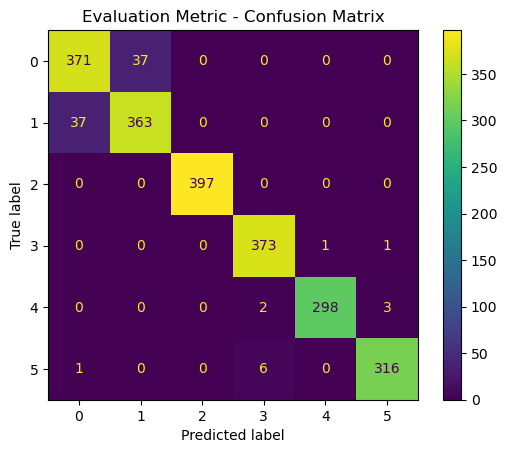

In [743]:
# model evaluation - confusion matrix

# get confusion matrix
cm = confusion_matrix(
  y_true = y_test,
  y_pred = y_hat
)

# show confusion matrix visual
labels = myfit.classes_
p1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
p1.plot()
plt.title('Evaluation Metric - Confusion Matrix')
plt.show()

In [744]:
# model evaluation - recall, precision , F1-score
metric_report = classification_report(y_true = y_test, y_pred = y_hat, output_dict = False) 
print(metric_report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       408
           1       0.91      0.91      0.91       400
           2       1.00      1.00      1.00       397
           3       0.98      0.99      0.99       375
           4       1.00      0.98      0.99       303
           5       0.99      0.98      0.98       323

    accuracy                           0.96      2206
   macro avg       0.96      0.96      0.96      2206
weighted avg       0.96      0.96      0.96      2206



## Test ML Model on New Data

In [745]:
# standardize column names
df_test.columns = new_all_cols

df_test.head()

,X001,X002,X003,X004,X005,X006,X007,X008,X009,X010,...,X554,X555,X556,X557,X558,X559,X560,X561,X562,y
0,-0.277708,-0.210631,2.193076,-0.787267,-0.833212,-0.093444,-0.808091,-0.839013,-0.104178,-0.824746,...,-0.344765,0.003566,0.357573,-1.363900,0.575487,-0.404790,0.622723,-0.038348,-1.580825,0
1,0.198660,0.182591,-0.250264,-0.876984,-0.929061,-0.858050,-0.897145,-0.928949,-0.863269,-0.824746,...,0.012257,-0.264092,0.030787,-0.747232,1.871192,-0.361739,0.636731,-0.145709,-1.580825,0
2,0.024587,-0.318055,-0.228485,-0.921598,-0.934054,-0.907107,-0.916891,-0.933813,-0.912639,-0.910982,...,-0.134989,-0.119671,0.446072,0.037919,0.323938,-0.370932,0.632845,-0.126855,-1.580825,0
3,-0.061057,-0.573037,-0.213709,-0.923837,-0.940817,-0.919082,-0.919152,-0.941599,-0.927776,-0.909740,...,-0.441714,-0.066443,0.338512,0.472695,0.625874,-0.363434,0.645276,-0.117585,-1.580825,0
4,0.013823,-0.387881,-0.494639,-0.921679,-0.929036,-0.949979,-0.916133,-0.923846,-0.951396,-0.909740,...,-0.796939,-0.022276,-0.098529,1.097348,-0.201999,-0.350256,0.665657,-0.104118,-1.580825,0


In [746]:
# rename y_labels
df_test.y = df_test.y.replace(y_labels)
df_test.head()

,X001,X002,X003,X004,X005,X006,X007,X008,X009,X010,...,X554,X555,X556,X557,X558,X559,X560,X561,X562,y
0,-0.277708,-0.210631,2.193076,-0.787267,-0.833212,-0.093444,-0.808091,-0.839013,-0.104178,-0.824746,...,-0.344765,0.003566,0.357573,-1.363900,0.575487,-0.404790,0.622723,-0.038348,-1.580825,0
1,0.198660,0.182591,-0.250264,-0.876984,-0.929061,-0.858050,-0.897145,-0.928949,-0.863269,-0.824746,...,0.012257,-0.264092,0.030787,-0.747232,1.871192,-0.361739,0.636731,-0.145709,-1.580825,0
2,0.024587,-0.318055,-0.228485,-0.921598,-0.934054,-0.907107,-0.916891,-0.933813,-0.912639,-0.910982,...,-0.134989,-0.119671,0.446072,0.037919,0.323938,-0.370932,0.632845,-0.126855,-1.580825,0
3,-0.061057,-0.573037,-0.213709,-0.923837,-0.940817,-0.919082,-0.919152,-0.941599,-0.927776,-0.909740,...,-0.441714,-0.066443,0.338512,0.472695,0.625874,-0.363434,0.645276,-0.117585,-1.580825,0
4,0.013823,-0.387881,-0.494639,-0.921679,-0.929036,-0.949979,-0.916133,-0.923846,-0.951396,-0.909740,...,-0.796939,-0.022276,-0.098529,1.097348,-0.201999,-0.350256,0.665657,-0.104118,-1.580825,0


In [747]:
# normalize all X_cols using z-score standardizaion
df_test[X_cols] = norm_z_score.fit_transform(df_test[X_cols])
df_test.head()

,X001,X002,X003,X004,X005,X006,X007,X008,X009,X010,...,X554,X555,X556,X557,X558,X559,X560,X561,X562,y
0,-0.277708,-0.210631,2.193076,-0.787267,-0.833212,-0.093444,-0.808091,-0.839013,-0.104178,-0.824746,...,-0.344765,0.003566,0.357573,-1.363900,0.575487,-0.404790,0.622723,-0.038348,-1.580825,0
1,0.198660,0.182591,-0.250264,-0.876984,-0.929061,-0.858050,-0.897145,-0.928949,-0.863269,-0.824746,...,0.012257,-0.264092,0.030787,-0.747232,1.871192,-0.361739,0.636731,-0.145709,-1.580825,0
2,0.024587,-0.318055,-0.228485,-0.921598,-0.934054,-0.907107,-0.916891,-0.933813,-0.912639,-0.910982,...,-0.134989,-0.119671,0.446072,0.037919,0.323938,-0.370932,0.632845,-0.126855,-1.580825,0
3,-0.061057,-0.573037,-0.213709,-0.923837,-0.940817,-0.919082,-0.919152,-0.941599,-0.927776,-0.909740,...,-0.441714,-0.066443,0.338512,0.472695,0.625874,-0.363434,0.645276,-0.117585,-1.580825,0
4,0.013823,-0.387881,-0.494639,-0.921679,-0.929036,-0.949979,-0.916133,-0.923846,-0.951396,-0.909740,...,-0.796939,-0.022276,-0.098529,1.097348,-0.201999,-0.350256,0.665657,-0.104118,-1.580825,0


In [748]:
# seperate data into X and y
X = df_test[X_include]
y = np.ravel(df_test[y_col])


In [749]:
# get predictions on test data
y_hat = myfit.predict(X)

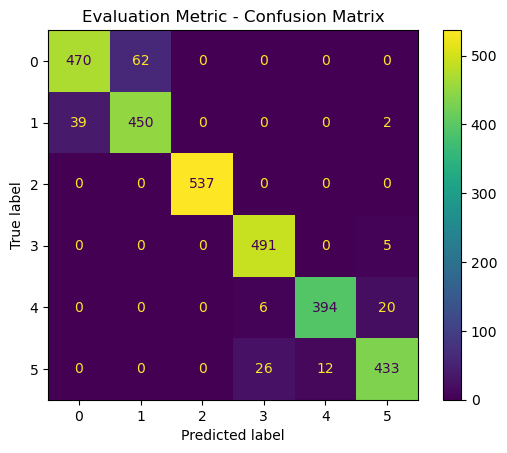

In [750]:
# model evaluation - confusion matrix

# get confusion matrix
cm = confusion_matrix(
  y_true = y,
  y_pred = y_hat
)

# show confusion matrix visual
labels = myfit.classes_
p1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
p1.plot()
plt.title('Evaluation Metric - Confusion Matrix')
plt.show()

In [751]:
# model evaluation - recall, precision , F1-score
metric_report = classification_report(y_true = y, y_pred = y_hat, output_dict = False) 
print(metric_report)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       532
           1       0.88      0.92      0.90       491
           2       1.00      1.00      1.00       537
           3       0.94      0.99      0.96       496
           4       0.97      0.94      0.95       420
           5       0.94      0.92      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947

